# Assignment: Bank Customer Churn Prediction

## Step1: Dataset Selection

- In this assignment to perform logistic regression and KNN regressor modeling, I have used the churn modelling data set from Kaggle(https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling).
- This data set contains details of customers in bank and the target variable is a binary variable which shows whether the customer left the bank (closed his account) or he continues to be a customer.

Data set variables:

* RowNumber: Row Numbers from 1 to 10000
* CustomerId: Unique Ids for bank customer identification
* Surname: Customer's last name
* CreditScore: Credit score of the customer
* Geography: The country from which the customer belongs
* Gender: Male or Female
* Age: Age of the customer
* Tenure:Number of years for which the customer has been with the bank
* Balance:Bank balance of the customer
* NumOfProducts: Number of bank products the customer is utilising
* HasCrCard: Whether customer has credit card
* IsActiveMember: Whether customer is active member of the bank or not.
* EstimatedSalary: Estimated salary for customer
* Exited: Binary variable which shows whether the customer left the bank (closed his account) or he continues to be a customer

## Step2: Data Loading and Cleaning

### 2.1. Load the dataset into a Pandas DataFrame.

Import the required libraries and load the dataset.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
)
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure compatibility with Pandas 3
pd.options.mode.use_inf_as_na = True

# set random seed
np.random.seed(10)

C:\Users\yashc\AppData\Local\Temp\ipykernel_20908\2051354866.py:17: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [2]:
# Load the dataset
customer_retention_data = pd.read_csv(r"C:\Users\yashc\Downloads\archive (3)\Churn_Modelling.csv")
customer_retention_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# getting concise summary of dataset
print(customer_retention_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [4]:
# statistical summary of the dataset
customer_retention_data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### 2.2. Identifying Categorical Columns

Manually specify the categorical columns to ensure proper processing.

In [5]:
# Manually specify categorical columns
categorical_cols =  ['Surname', 'Geography', 'Gender', 'Exited']

# Explanation of categorical columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['Surname', 'Geography', 'Gender', 'Exited']


### 2.3. Identifying Numerical Columns

In [6]:
# Numerical columns are all other columns excluding categorical and the identifier column
numeric_cols = [col for col in customer_retention_data.columns if col not in categorical_cols + ['RowNumber', 'CustomerId', 'Exited']]

print("Numerical Columns:", numeric_cols)

Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


### 2.4. Identify and handle missing data

In [7]:
# checking missing values
missing_values = customer_retention_data.isnull().sum()
print(missing_values)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


* For the churn modeling dataset, there are no missing values found. Hence, we do not drop any rows/columns or impute missing values.

### 2.5. Identify any categorical variables that need to be encoded and applying encoding

Machine learning models require numerical input. We'll encode categorical variables accordingly.

#### 2.5.1. Identifying Nominal and Ordinal Variables

If the variables are ordinal, we do not need to encode them.
For any variables that are not ordinal, we can use one-hot encoding.
Let's start by looking at the variable's values.

In [8]:
for col in categorical_cols:
    print(f"{col}: {customer_retention_data[col].unique()}")
    print("-")

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
-
Geography: ['France' 'Spain' 'Germany']
-
Gender: ['Female' 'Male']
-
Exited: [1 0]
-


#### 2.5.2. Apply One-Hot Encoding or Ordinal Encoding where appropriate.

In this dataset, we have two categorical columns that requires one-hot encoding i.e. Geography(nominal data) and Gender(as it has only 2 values, we can treat it as binary nominal variable). And Exited is the binary variable as it has 0 or 1, and therefore do not need to be encoded.

**Assumption:**

- **Ordinal Variable:**
  - None of these variables seem to be ordinal
- **Binary Variables**:
  - Gender: currently as Male Female, therefore need to ecode to yes=1, and no=0
  - Exited: Already encoded
- **Nominal Variables:**
  - **Geography:** (France, Spain, Germany)

In [9]:
male_female_mapping = {'Male': 0, 'Female': 1}    
customer_retention_data['Gender'] = customer_retention_data['Gender'].map(male_female_mapping)

In [10]:
customer_retention_data = pd.get_dummies(customer_retention_data, columns= ['Geography'])

#### Look at cleaned data set

In [11]:
customer_retention_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


#### 2.6. Perform train-test splitting to avoid data leakage.

To prepare the data for modeling, we'll split it into training and test sets. We'll use an 80/20 split.

**Note**: To avoid data leakage, it's important to split the data into training and test sets before performing standardization. This ensures that information from the test set doesn't influence the training process.

In [12]:
# Separate the target variable and features
X = customer_retention_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = customer_retention_data['Exited']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 8000 samples
Test set size: 2000 samples


#### 2.7. Standardizing Numeric Variables After Splitting

Differences in scale can adversely affect some machine learning models. We'll standardize numeric variables **after** the data split to prevent data leakage.

Here, we scale the numeric variables using standardization method.

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply the scaler to the test data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Numeric columns have been standardized after splitting.")

Numeric columns have been standardized after splitting.


## Step 3: Logistic Regression Model


In this step, we fit a logistic regression model, to assess the relationship between the features and the target variable. Logistic regression is well-suited for classification problems. Here, we are predicting customer churn, estimating the probability that a given customer will churn (Exited = 1) or not (Exited = 0). After fitting the model, we evaluate its performance by making predictions on the test set and calculating key classification metrics including accuracy, precision, recall, and the F1 score to assess the balance between false positives and false negatives.

We will use GridSearchCV to find the best regularization parameter `C`.


In [14]:
# Define the parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 100}


#### Best Logistic Regression Model


In [15]:
# Get the best model
best_lr = grid_search_lr.best_estimator_

#### Logistic Regression Evaluation


#### Predictions


In [16]:
# Make predictions
y_pred_lr = best_lr.predict(X_test)

#### Confusion Matrix


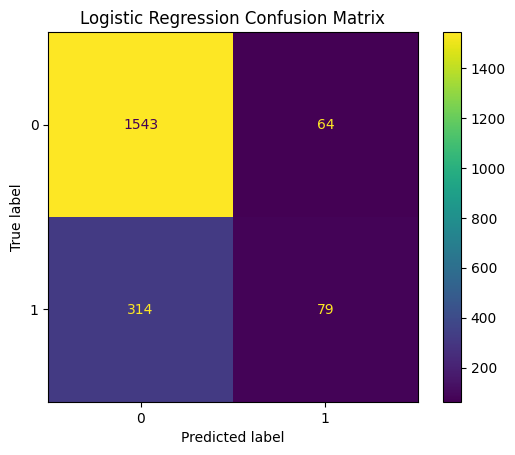

In [17]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#### Performance Metrics


In [18]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

Logistic Regression Metrics:
Accuracy: 0.8110
Precision: 0.5524
Recall: 0.2010
F1 Score: 0.2948


## Step 4: K-Nearest Neighbors Regressor Model:


For this dataset, KNN helps to identify customer churn by comparing each customer to others with similar profiles. After fitting the KNN model, we make predictions on the test set and evaluate its performance using a confusion matrix and accuracy-related metrics such as precision, recall, and F1 score, allowing a direct comparison with the logistic regression model.

We will use GridSearchCV to find the best value for `n_neighbors`.


In [19]:
# Define the parameter grid
param_grid_knn = {'n_neighbors': range(1, 21)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Best parameters
print("Best parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)

Best parameters for K-Nearest Neighbors: {'n_neighbors': 3}


#### Best KNN Model


In [20]:
# Get the best model
best_knn = grid_search_knn.best_estimator_

#### K-Nearest Neighbors Evaluation


#### Predictions


In [21]:
# Make predictions
y_pred_knn = best_knn.predict(X_test)

#### Confusion Matrix

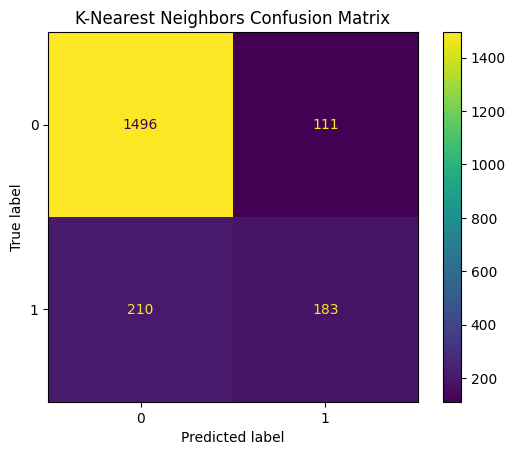

In [22]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

#### Performance Metrics


In [23]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

K-Nearest Neighbors Metrics:
Accuracy: 0.8395
Precision: 0.6224
Recall: 0.4656
F1 Score: 0.5328


## Step 5: Confusion Matrix Evaluation

Here, I am comparing False Positives (FP) and False Negatives (FN) based on the confusion matrices for the churn modelling data set used, for both logistic regression and K-Nearest Neighbors (KNN) models:

Logistic Regression Confusion Matrix:
* True Negatives (TN): 1543
* True Positives (TP): 79
* False Negatives (FN): 314
* False Positives (FP): 64

K-Nearest Neighbors (KNN) Confusion Matrix:
* True Negatives (TN): 1496
* True Positives (TP): 183
* False Negatives (FN): 210
* False Positives (FP): 111

Comparison of Confusion Matrices:

False Positives (FP): Logistic Regression model predicts fewer false positives than KNN model, which means fewer customers are incorrectly classified as churn but they are actually not churning.
False Negatives (FN): KNN model has fewer false negatives than Logistic Regression model, meaning it identifies customers who are actually churning in a better way.

Real-world implication:

False Positives (FP): If a customer is predicted to churn but they don't, the company may waste resources trying to retain that customer with unnecessary interventions. While this costs time and money, the customer is still not lost.
False Negatives (FN): If a customer is predicted not to churn but actually does, the company losses the chance to intervene and retain them, leading to potential revenue loss. This is more damaging than a false positive.

Here we can conclude that: 

The Logistic Regression model minimizes false positives, which means fewer resources will be wasted on customers not at risk of churning.
The KNN model does a better job at reducing false negatives, meaning it more accurately identifies customers who are truly at risk of churning, which is crucial for customer retention efforts.
In the context of customer churn, minimizing False Negatives (FN) is generally more important because losing a customer has a direct financial impact.

## Step 6: Model Comparison

Logistic Regression Metrics:
* Accuracy: 0.8110
* Precision: 0.5524
* Recall: 0.2010
* F1 Score: 0.2948

K-Nearest Neighbors (KNN) Metrics:
* Accuracy: 0.8395
* Precision: 0.6224
* Recall: 0.4656
* F1 Score: 0.5328

Comparison:

* KNN performs better with an accuracy of 83.95% compared to Logistic Regression's 81.10%. This indicates that KNN is slightly better at making correct predictions.
* KNN also has a higher precision of 62.24% compared to Logistic Regression's 55.24%. This indicates that KNN is better at correctly predicting customers who churn, it means fewer false positives.
* KNN also has a better recall of 46.56% compared to Logistic Regression's 20.10%. This indicates that KNN is more effective at identifying customers who actually churn, it means it catches more true positives and has fewer false negatives.
* The F1 Score for KNN of 53.28% is much higher than Logistic Regression's 29.48%. This indicates that KNN strikes a better balance between precision and recall, making it more effective at handling both false positives and false negatives.

Here we can conclude that:

Based on these metrics, the K-Nearest Neighbors (KNN) model outperforms the Logistic Regression model on this churn modelling data set. KNN has higher accuracy, precision, recall, and F1 score, making it a more reliable model for predicting customer churn. Therefore, KNN is the better model for this task due to its superior performance across multiple key metrics.